In [1]:
# Importing necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
sns.set()

# Load the data

In [2]:
df=pd.read_csv("Data_Airline.csv")
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
df.shape

(129880, 24)

In [4]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [5]:
# handling  wrong dtypes
print(df.dtypes)

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                            object
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [6]:
df['Flight Distance']=pd.to_numeric(df['Flight Distance'],errors='coerce')

In [7]:
print(df.dtypes)

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                           float64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


# Data Pre-processing

In [8]:
# duplicates - handling part

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
129875    False
129876    False
129877    False
129878    False
129879    False
Length: 129880, dtype: bool

In [9]:
df.duplicated().sum()

0

In [10]:
# Null values

df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             3
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [11]:
df.isnull().sum().sum()

396

In [12]:
df.isnull().sum()/len(df)*100 # percentage of null values

ID                                        0.000000
Gender                                    0.000000
Age                                       0.000000
Customer Type                             0.000000
Type of Travel                            0.000000
Class                                     0.000000
Flight Distance                           0.002310
Departure Delay                           0.000000
Arrival Delay                             0.302587
Departure and Arrival Time Convenience    0.000000
Ease of Online Booking                    0.000000
Check-in Service                          0.000000
Online Boarding                           0.000000
Gate Location                             0.000000
On-board Service                          0.000000
Seat Comfort                              0.000000
Leg Room Service                          0.000000
Cleanliness                               0.000000
Food and Drink                            0.000000
In-flight Service              

In [13]:
cols_to_impute=['Flight Distance','Arrival Delay']

In [14]:
df[cols_to_impute]=df[cols_to_impute].fillna(df[cols_to_impute].median())

In [15]:
df.isnull().sum().sum()

0

# EDA

In [16]:
import dtale
dtale.show(df)

# Outliers Handling

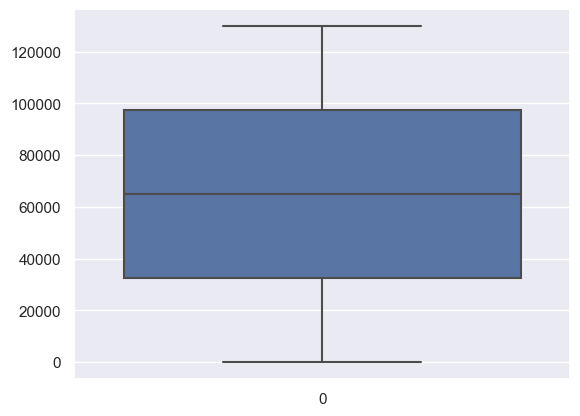

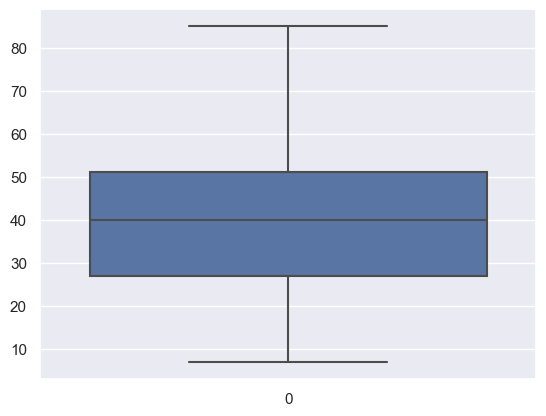

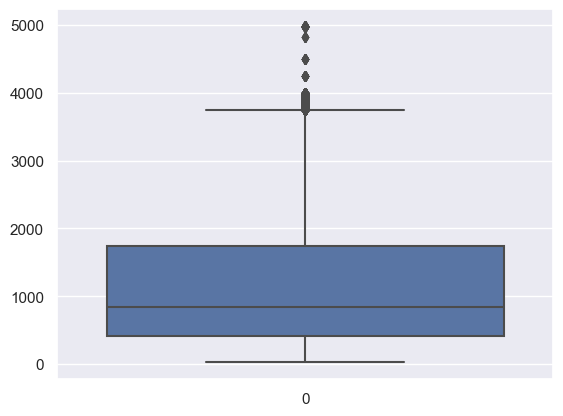

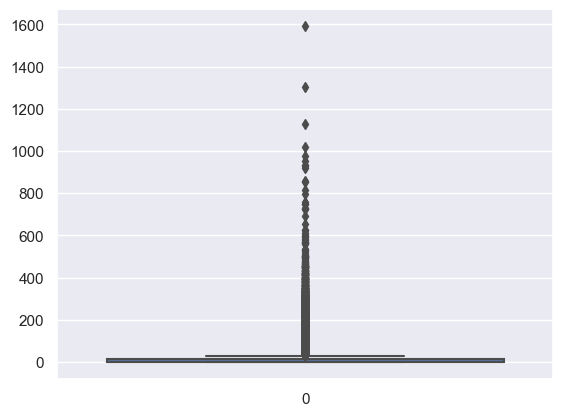

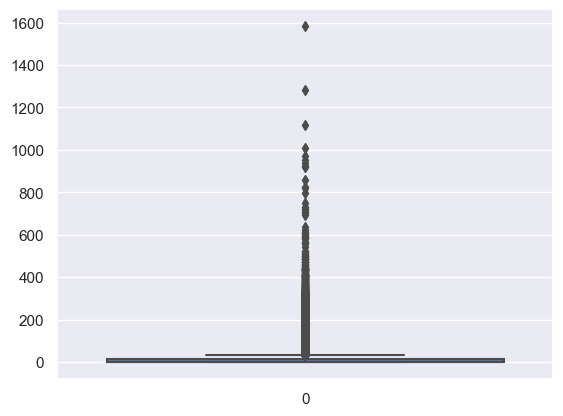

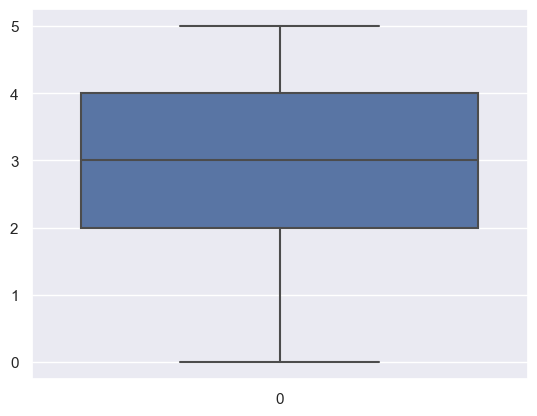

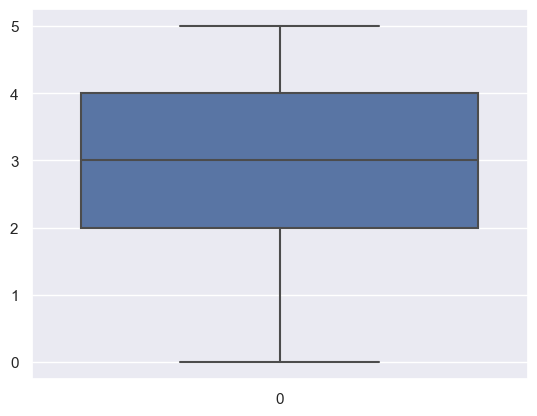

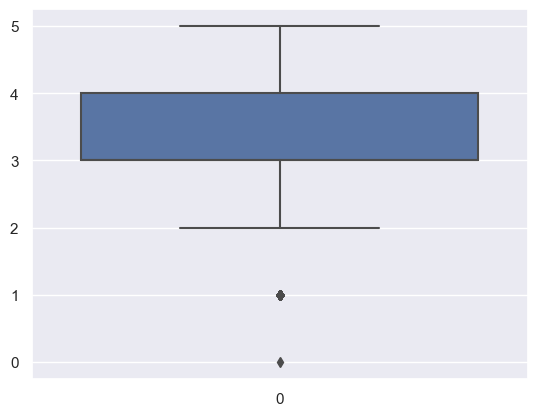

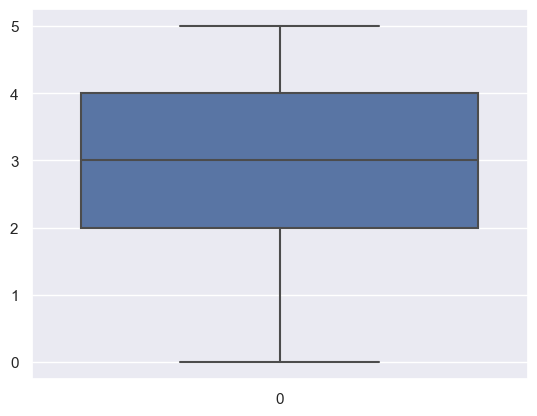

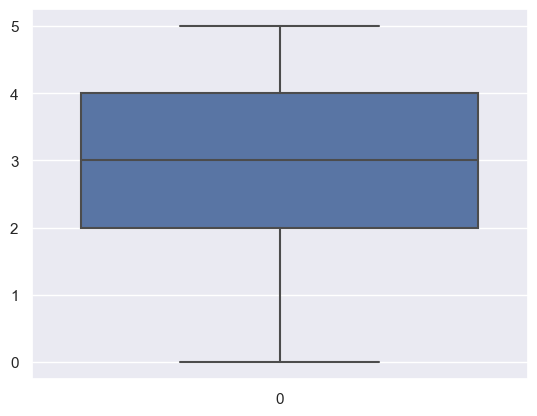

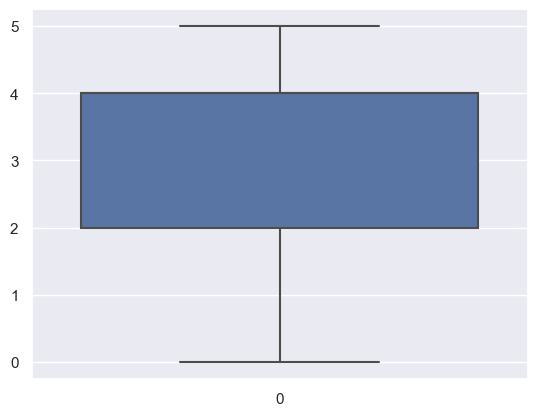

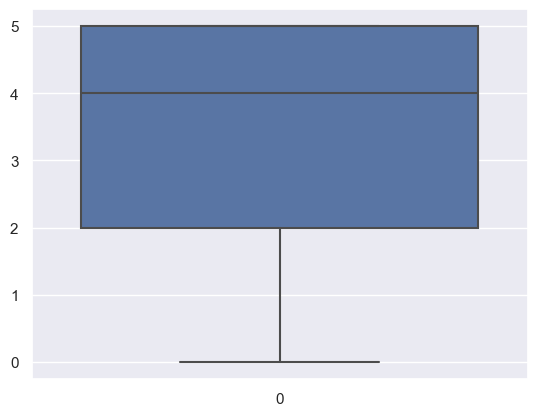

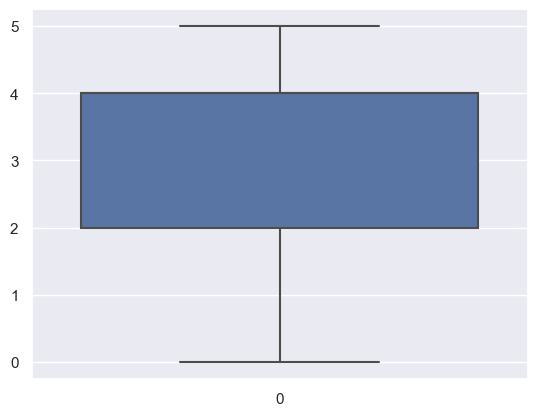

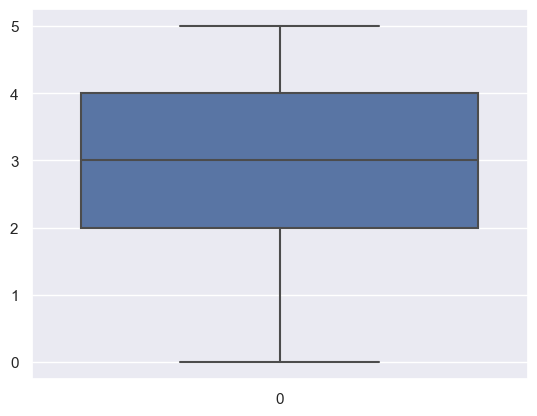

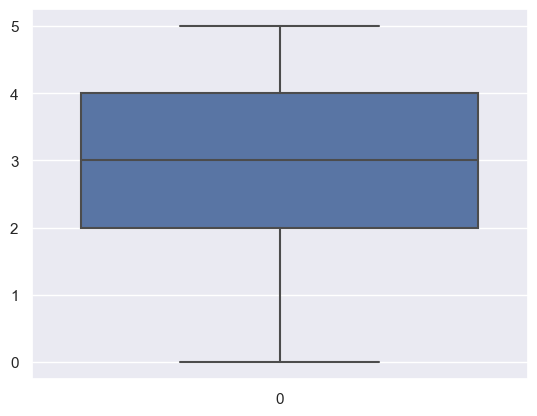

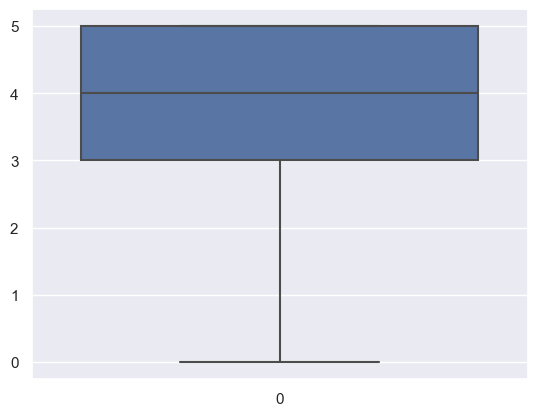

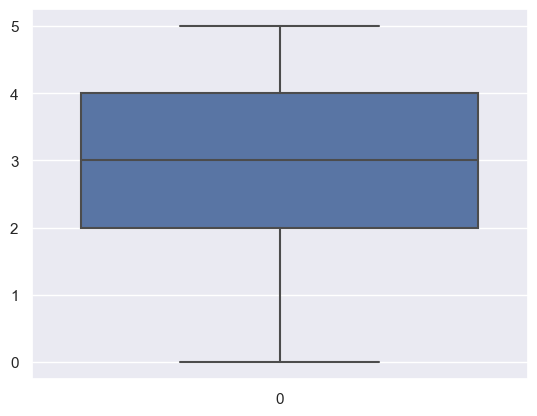

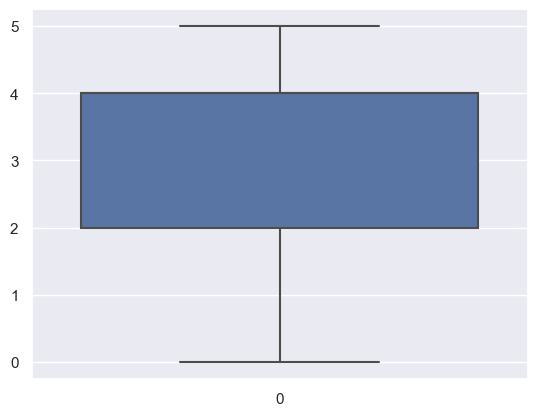

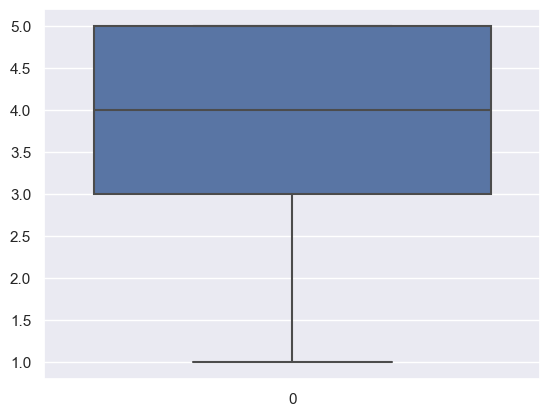

In [17]:
# Checking outlier

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [18]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.304250,14.713713,15.045465,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.423257,38.071126,38.416353,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# encoding part

In [19]:
cols=['Gender','Customer Type','Type of Travel','Class','Satisfaction']

In [20]:
uni_values=df[cols].nunique()

In [21]:
print(uni_values)

Gender            2
Customer Type     2
Type of Travel    2
Class             3
Satisfaction      2
dtype: int64


In [22]:
for col in cols:
    print(f"value counts for {col}:")
    print(df[col].value_counts())
    print()

value counts for Gender:
Gender
Female    65899
Male      63981
Name: count, dtype: int64

value counts for Customer Type:
Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64

value counts for Type of Travel:
Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64

value counts for Class:
Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

value counts for Satisfaction:
Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64



In [23]:
cols=['Gender','Customer Type','Type of Travel','Satisfaction']
for col in cols:
    df[col]=df[col].map({df[col].unique()
                        [0]:0,df[col].unique()[1]:1})

In [24]:
df['Class']=df['Class'].map({'Business':0,'Economy':1,'Economy Plus':2})

In [25]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,0,48,0,0,0,821.0,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,1,35,1,0,0,821.0,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,0,41,1,0,0,853.0,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,0,50,1,0,0,1905.0,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,1,49,1,0,0,3470.0,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


In [26]:
print(df.skew())

ID                                        0.000000
Gender                                   -0.029539
Age                                      -0.003606
Customer Type                            -1.638879
Type of Travel                            0.824595
Class                                     0.547243
Flight Distance                           1.108173
Departure Delay                           6.821980
Arrival Delay                             6.678957
Departure and Arrival Time Convenience   -0.332469
Ease of Online Booking                   -0.018779
Check-in Service                         -0.366569
Online Boarding                          -0.456911
Gate Location                            -0.058265
On-board Service                         -0.421320
Seat Comfort                             -0.485818
Leg Room Service                         -0.348414
Cleanliness                              -0.300926
Food and Drink                           -0.155063
In-flight Service              

# split data into train and test

In [27]:
# split the data into independent and dependent variables
x = df.drop('Satisfaction', axis=1)
y = df['Satisfaction']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature Scaling

In [29]:
# scaling x_train and x_test data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Selection

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [31]:
# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train_scaled, y_train)
y_pred_lr = logit.predict(x_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [32]:
# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train_scaled, y_train)
y_pred_dt = dtree.predict(x_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [33]:
# RandomForest
rforest = RandomForestClassifier()
rforest = rforest.fit(x_train_scaled, y_train)
y_pred_rf = rforest.predict(x_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [34]:
# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train_scaled, y_train)
y_pred_xg = xgboost.predict(x_test_scaled)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

In [35]:
# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [36]:
# SVM
svm = SVC()
svm = svm.fit(x_train_scaled, y_train)
y_pred_svm = svm.predict(x_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [37]:
# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train_scaled, y_train)
y_pred_nbt = nbt.predict(x_test_scaled)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

In [38]:
# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree), ('rforest',rforest),('xgboost',xgboost),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train_scaled, y_train)
pred_evc = model_evc.predict(x_test_scaled)
accuracy_evc = accuracy_score(y_test, pred_evc)

      Method Used  Accuracy
0  LogitRegession  0.874731
1           Dtree  0.945103
2         RForest  0.964429
3             XGB  0.965930
4             KNN  0.930821
5             SVM  0.956190
6             NBT  0.865183
7          Voting  0.960002
Axes(0.125,0.11;0.775x0.77)


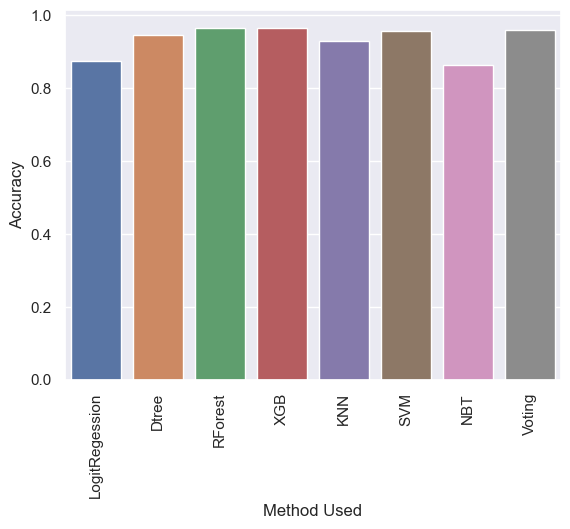

In [39]:
list1 = ['LogitRegession','Dtree','RForest','XGB','KNN','SVM','NBT','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xg,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc]
list3 = [logit,dtree,rforest,xgboost,knn,svm,nbt,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)   

In [44]:
# Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off

pred_xgboost_train = xgboost.predict(x_train_scaled)
pred_xgboost_test = xgboost.predict(x_test_scaled)
accuracy_xgboost_train = accuracy_score(y_train, pred_xgboost_train)
accuracy_xgboost_test = accuracy_score(y_test, pred_xgboost_test)

print("************************")
print("Training Accuracy :",accuracy_xgboost_train)
print("************************")
print("Testb Accuracy :",accuracy_xgboost_test)

************************
Training Accuracy : 0.9779219279334771
************************
Testb Accuracy : 0.9659300893132122


# Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(xgboost, x_train_scaled, y_train, cv=10)
print("Training Accuracy :", training.mean())
print("***************")
print("Testb Accuracy :",accuracy_xgboost_test)

Training Accuracy : 0.9644864415409463
***************
Testb Accuracy : 0.9659300893132122


In [46]:
training

array([0.96246752, 0.96699066, 0.96631701, 0.96294871, 0.96323388,
       0.96044273, 0.96275265, 0.96833494, 0.966795  , 0.96458133])

In [47]:
# Classification report

In [48]:
print("************************")
print("Training Accuracy :",classification_report(y_train, pred_xgboost_train))
print("************************")
print("Testb Accuracy :",classification_report(y_test, pred_xgboost_test))

************************
Training Accuracy :               precision    recall  f1-score   support

           0       0.97      0.99      0.98     58729
           1       0.98      0.96      0.97     45175

    accuracy                           0.98    103904
   macro avg       0.98      0.98      0.98    103904
weighted avg       0.98      0.98      0.98    103904

************************
Testb Accuracy :               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.95      0.96     11253

    accuracy                           0.97     25976
   macro avg       0.97      0.96      0.97     25976
weighted avg       0.97      0.97      0.97     25976



In [49]:
# Confusion Matrix
print("************************")
print(confusion_matrix(y_train, pred_xgboost_train))
print("************************")
print(confusion_matrix(y_test, pred_xgboost_test))

************************
[[58022   707]
 [ 1587 43588]]
************************
[[14413   310]
 [  575 10678]]


2025-05-07 11:47:12,214 - ERROR    - Exception occurred while processing request: list index out of range
Traceback (most recent call last):
  File "C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\dtale\views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\dtale\views.py", line 3889, in chart_export_all
    output = export_chart(data_id, params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\dtale\dash_application\charts.py", line 4150, in export_chart
    chart[0],
    ~~~~~^^^
IndexError: list index out of range
